<a href="https://colab.research.google.com/github/outinletter/DataAnalysis/blob/main/K_ICT_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0%2C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B0%95%EC%9D%98%2C_12%EA%B0%95_%EB%82%98%EC%9D%B4%EB%B8%8C_%EB%B2%A0%EC%9D%B4%EC%A6%88_%EA%B0%9C%EB%85%90_%EB%B0%8F_%EC%8A%A4%ED%8C%B8%EB%A9%94%EC%9D%BC_%ED%95%84%ED%84%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B5%AC%EC%B6%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12-1 나이브 베이즈 개념 및 스팸메일 필터 데이터 구축
> https://www.youtube.com/watch?v=foa-OJXwjnY&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=69&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

> 나이브 베이즈
- 확률 기반 분류기로 특징이 상호 독립적이라는 가정 하에 클래스 전체의 확률 분포 대비 특정 클래스에 속할 확률을 베이즈 정리를 기반으로 계산
- 데이터가 각 클래스에 속할 특징 확률을 계산
- 나이브(Naive)란 예측한 특징이 상호 독립적이라는 가정 하에 확률 계산을 단순화함
- 베이즈(Bayes)란 입력 특징이 클래스 전체의 확률 분포 대비 특정 클래스에 속할 확률을 베이즈 정리를 기반으로 계산

> 용어 개념
- 사전 확률 : 샘플 데이터가 k에 속하는 사건의 확률 P(yk)는 관측값의 특징에 대한 지식없이 클래스가 어떻게 분포되어 있는지 나타냄
- 사전 확률은 사전에 결정되어 있거나, 학습 샘플 데이터를 이용해 학습시킬 수도 있음
- 사후 확률 : P(yk\x)는 관측값에 대해 외부 지식을 이용한 사후 확률
- 유사가능도 : P(x\yk)는 클래스 yk에 속한 샘플 데이터가 주어졌을 때 n개의 특징에 대한 결합 분포를 나타냄
- 라플라스 스무딩(Laplace smoothing) : 특징의 출현 횟수가 초기값을 1부터 시작해 0을 곱해 발생하는 문제를 해결(발생하지 않은 특징의 출현 빈도 초기값을 1로 설정)

www2.aueb.gr/users/ion/data/enron-spam/

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 %matplotlib inline

In [ ]:
import os
import glob

In [ ]:
emails, labels = [], []

In [ ]:
# paths = ['enron1/spam/', 'enron1/ham/']
paths = ['/content/drive/MyDrive/참고 코딩 Code 모음/K-ICT 빅데이터센터 참고자료/enron1/spam/', '/content/drive/MyDrive/참고 코딩 Code 모음/K-ICT 빅데이터센터 참고자료/enron1/ham/']

for path in paths:
    for filename in glob.glob(os.path.join(path, '*.txt')):
        #with open(filename, 'r', encoding='ISO-8859-1') as file:
        with open(filename, 'r', encoding='ISO-8859-1') as file:
            emails.append(file.read())
            if path.endswith('spam/'):
                labels.append(1)
            else :
                labels.append(0)
print(np.unique(labels, return_counts=True))

(array([0, 1]), array([3682, 1500]))


In [ ]:
import nltk
nltk.download('names')
nltk.download('wordnet')

In [ ]:
from nltk.corpus import naems
from nltk.stem import WordNetLemmatizer

all_names = set(naems.words())
lemmatizer = WordNetLemmatizer()

In [ ]:
cleaned_emails = []
for email in emails :
    cleadned_emails.append(' '.join([ lemmatizer.lemmatize(word.lower())
                              for word in emil.split() 
                              if word.isalpha() and word not in all_names]))
cleaned_emails[0]

In [ ]:
from sklearn.feature_extraciton.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = 'english', max_features=500)
term_docs = vectorizer.fit_transform(cleaned_emails)

In [ ]:
print(term_docs[0])

In [ ]:
term_docs.toarray()

In [ ]:
feature_names = vectorizer.get_feature_names()
print(feature_names)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cleaned_emails, labels, test_size=0.3, random_state =35)
len(X_train), len(X_test), len(y_train), len(y_test)

In [ ]:
term_docs_train = vectorizer.fit_transform(X_train)
term_docs_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MutinomialNB

naive_bayes = MutinomialNB(alpha=1, fit_prior=True)
naive_bayes.fit(term_docs_train, y_train)
y_pred = naive_bayes.predict(term_docs_test)
np.unique(y_pred, return_counts=True)

In [ ]:
naive_bayes.score(term_docs_test, y_test)

In [ ]:
y_pred_proba = naive_bayes.predict_proba(term_docs_test)
# 0, 1 이진분류 형태로 반환

In [ ]:
from sklearn.metircs import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, 'r-', label='MultinomialNB')
plt.plot([0,1], [0,1], 'b--', label='random guessing')
plt.title('AUC = {:.4f'}.format(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'alpha' : [0.5, 1.0, 1.5, 2.0],
    'fit_prior': [True, False]
}
grid_search = GridSearchCV(naive_bayes, parameters, n_jobs=-1, cv=10, scoring='roc_auc')

In [ ]:
grid_search.fit(term_docs_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
naive_bayes_best = grid_searach.best_estimator_

In [ ]:
y_pred_proba= naive_bayes_best.predict_proba(term_docs_test)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, 'r-', label='MultinomialNB')
plt.plot([0,1], [0,1], 'b--', label='random guessing')
plt.title('AUC = {:.4f'}.format(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# 13-1 - 추천 엔진의 개념과 종류
> https://www.youtube.com/watch?v=mkSkIWQBK_Q&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=74&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

- 유사성의 정의를 명확히 해야 : 단순히 나이나 성별 등을 의미하는 것이 아닌, 사용자에 의해 표현된 선호도(비슷한 상품을 구입, 상품에 대한 평가 등이 유사)

## 실습 영상
> https://www.youtube.com/watch?v=RMfslt0DiOc&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=78&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/참고 코딩 Code 모음/K-ICT 빅데이터센터 참고자료/ml-100k/u.data', sep='\t', header=None)
df.columns = ['user_id', 'item_id', 'rating', 'timestamp']
df.head()

In [ ]:
df.shape

(100000, 4)

In [ ]:
df.groupby(['rating'])[['user_id']].count()

,user_id
rating,
1,6110
2,11370
3,27145
4,34174
5,21201


In [ ]:
df.groupby(['item_id'])[['user_id']].count().head()

,user_id
item_id,
1,452
2,131
3,90
4,209
5,86


## 평가 행렬(ratings)의 생성

In [ ]:
n_users = df.user_id.unique().shape[0]
n_users

943

In [ ]:
df.user_id.value_counts()

405    737
655    685
13     636
450    540
276    518
      ... 
147     20
19      20
572     20
636     20
895     20
Name: user_id, Length: 943, dtype: int64

In [ ]:
df[df['user_id']==196].head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
940,196,393,4,881251863
1133,196,381,4,881251728
1812,196,251,3,881251274
1896,196,655,5,881251793


In [ ]:
n_items = df.item_id.unique().shape[0]
n_items

1682

In [ ]:
# 평점 정보를 넣기 위해 행과 열의 구조 만듦
ratings = np.zeros((n_users, n_items))
ratings.shape

(943, 1682)

In [ ]:
ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

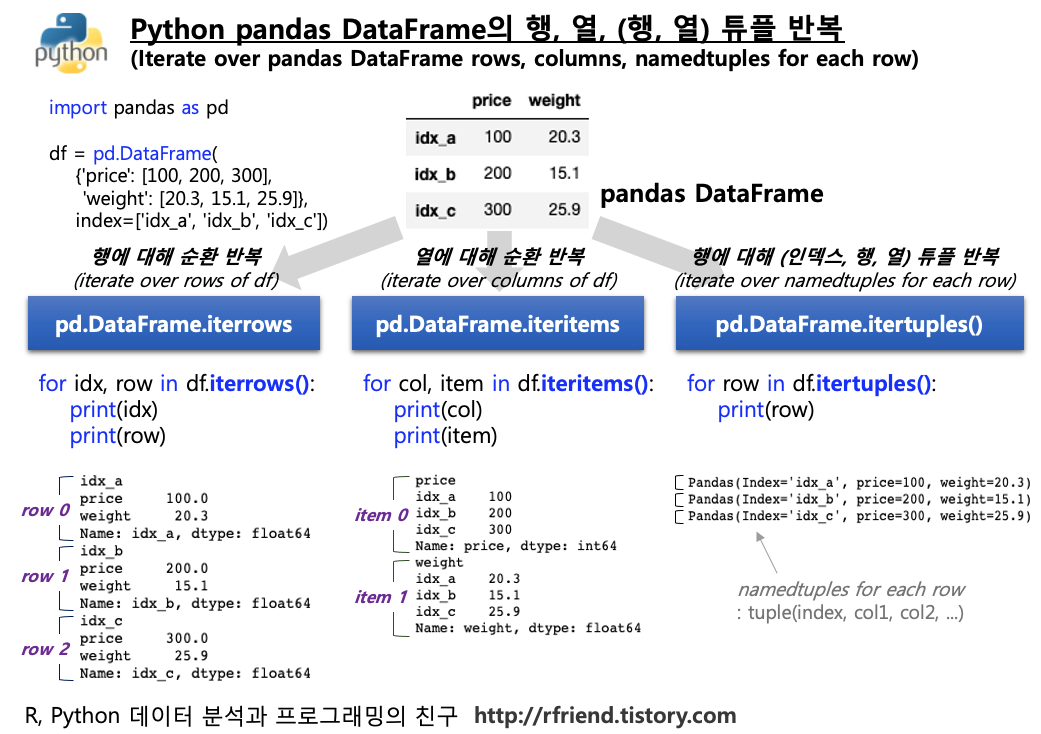

In [ ]:
# row 출력값 :
    # Pandas(Index=29113, user_id=334, item_id=425, rating=4, timestamp=891548835)
    # Pandas(Index=29114, user_id=59, item_id=135, rating=5, timestamp=888204758)
    # Pandas(Index=29115, user_id=487, item_id=227, rating=3, timestamp=883531279)
# row[  ,  ] : row 행과 열 정보를 사용
# row[1]-1 : user_id
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]

# 해당 위치를 찾아 평가 점수를 입력

In [ ]:
type(ratings)

numpy.ndarray

In [ ]:
ratings.shape

(943, 1682)

In [ ]:
# 5 : 첫 번째 사용자의 첫 번째 영화에 대한 평점 
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
# 비지도 학습이라 y를 부여하지 않음
ratings_train, ratings_test = train_test_split(ratings, test_size=0.33, random_state=42)
ratings_train.shape, ratings_test.shape

((631, 1682), (312, 1682))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

user_distances = cosine_similarity(ratings_train)
user_distances

array([[1.        , 0.36475764, 0.44246231, ..., 0.02010641, 0.33107929,
        0.25638518],
       [0.36475764, 1.        , 0.42635255, ..., 0.06694419, 0.27339314,
        0.22337268],
       [0.44246231, 0.42635255, 1.        , ..., 0.06675756, 0.25424373,
        0.22320126],
       ...,
       [0.02010641, 0.06694419, 0.06675756, ..., 1.        , 0.04853428,
        0.05142508],
       [0.33107929, 0.27339314, 0.25424373, ..., 0.04853428, 1.        ,
        0.1198022 ],
       [0.25638518, 0.22337268, 0.22320126, ..., 0.05142508, 0.1198022 ,
        1.        ]])

In [ ]:
# 사용자 간의 유사도 행렬 만들기
from sklearn.metrics.pairwise import cosine_distances

cosine_distances(ratings_train)

array([[0.        , 0.63524236, 0.55753769, ..., 0.97989359, 0.66892071,
        0.74361482],
       [0.63524236, 0.        , 0.57364745, ..., 0.93305581, 0.72660686,
        0.77662732],
       [0.55753769, 0.57364745, 0.        , ..., 0.93324244, 0.74575627,
        0.77679874],
       ...,
       [0.97989359, 0.93305581, 0.93324244, ..., 0.        , 0.95146572,
        0.94857492],
       [0.66892071, 0.72660686, 0.74575627, ..., 0.95146572, 0.        ,
        0.8801978 ],
       [0.74361482, 0.77662732, 0.77679874, ..., 0.94857492, 0.8801978 ,
        0.        ]])

In [ ]:
distances = 1 - cosine_distances(ratings_train)
distances

array([[1.        , 0.36475764, 0.44246231, ..., 0.02010641, 0.33107929,
        0.25638518],
       [0.36475764, 1.        , 0.42635255, ..., 0.06694419, 0.27339314,
        0.22337268],
       [0.44246231, 0.42635255, 1.        , ..., 0.06675756, 0.25424373,
        0.22320126],
       ...,
       [0.02010641, 0.06694419, 0.06675756, ..., 1.        , 0.04853428,
        0.05142508],
       [0.33107929, 0.27339314, 0.25424373, ..., 0.04853428, 1.        ,
        0.1198022 ],
       [0.25638518, 0.22337268, 0.22320126, ..., 0.05142508, 0.1198022 ,
        1.        ]])

In [ ]:
distances.shape
# 정방 행렬이 만들어짐

(631, 631)

In [ ]:
user_pred = user_distances.dot(ratings_train) / np.array([np.abs(user_distances).sum(axis=1)]).T

In [ ]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [ ]:
np.sqrt(get_mse(user_pred, ratings_test))
# 훈련에 대한 평가 지표

2.9870546415652575

In [ ]:
np.sqrt(get_mse(user_pred, ratings_test))

2.9870546415652575

In [ ]:
from sklearn.neighbors import NearestNeighbors
# 비지도학습용으로 이웃을 검색할 때 사용하는 클래스

k=5
neigh = NearestNeighbors(n_neighbors=k, metric = 'cosine')

In [ ]:
neigh.fit(ratings_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
top_k_distances, top_k_users = neigh.kneighbors(ratings_train, return_distance=True)

In [ ]:
top_k_users

array([[  0, 589, 155,  33, 364],
       [  1, 483, 339, 172, 188],
       [  2, 382, 560, 350, 155],
       ...,
       [628, 258, 242, 229, 494],
       [629, 378, 155, 589, 591],
       [630, 495, 201, 417, 603]])

In [ ]:
top_k_distances

array([[0.        , 0.38230161, 0.39990633, 0.40834169, 0.4100445 ],
       [0.        , 0.4625691 , 0.50677921, 0.50811827, 0.50882566],
       [0.        , 0.46538829, 0.48267976, 0.49176259, 0.49265099],
       ...,
       [0.        , 0.5764934 , 0.59340849, 0.64699606, 0.66472075],
       [0.        , 0.60496802, 0.6115226 , 0.62054374, 0.6229481 ],
       [0.        , 0.56320216, 0.60221688, 0.60314589, 0.6400121 ]])

In [ ]:
user_pred_k = np.zeros(ratings_train.shape)

In [ ]:
for i in range(ratings_train.shape[0]):
    user_pred_k[i, :] = top_k_distances[i].T.dot(ratings_train[top_k_users][i])/ np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T

In [ ]:
user_pred_k

array([[4.25618269, 2.49082621, 0.71654943, ..., 0.        , 0.        ,
        0.        ],
       [3.74418756, 0.        , 2.48873124, ..., 0.        , 0.        ,
        0.        ],
       [3.22293592, 2.98635211, 2.47648118, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.07143091, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.73945823, 2.48622549, 1.76969702, ..., 0.        , 0.        ,
        0.        ],
       [1.95357502, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
np.sqrt(get_mse(user_pred_k, ratings_train))

2.0922014531938316

In [ ]:
np.sqrt(get_mse(user_pred_k, ratings_test))

3.054698791142718